In [4]:
import pandas as pd
import os

# Fix the path - go up one level from notebooks folder
csv_dir = '../data/processed'
print("=== AVAILABLE DATA FILES ===\n")

for file in os.listdir(csv_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(csv_dir, file))
        print(f"📁 {file}")
        print(f"   Rows: {len(df):,} | Columns: {len(df.columns)}")
        print(f"   Columns: {df.columns.tolist()[:5]}...")  # First 5 columns
        print()


=== AVAILABLE DATA FILES ===

📁 KNA1.csv
   Rows: 1,688 | Columns: 5
   Columns: ['Customer', 'Country/Region Key', 'Name 1', 'City', 'Region']...

📁 KNVV.csv
   Rows: 1,867 | Columns: 4
   Columns: ['Customer', 'Sales Organization', 'Distribution Channel', 'Division']...

📁 MAKT.csv
   Rows: 7,556 | Columns: 2
   Columns: ['Material', 'Material Description']...

📁 MARA.csv
   Rows: 5,462 | Columns: 4
   Columns: ['Material', 'Material type', 'Material Group', 'Base Unit of Measure']...

📁 MBEW.csv
   Rows: 10,000 | Columns: 109
   Columns: ['Material', 'Valuation area', 'Valuation Type', 'Del. flag val. type', 'Total Stock']...

📁 MVKE.csv
   Rows: 10,000 | Columns: 4
   Columns: ['Material', 'Sales Organization', 'Distribution Channel', 'Product hierarchy']...

📁 PRCD_ELEMENTS.csv
   Rows: 10,000 | Columns: 10
   Columns: ['Doc. Condition No.', 'ItemNo', 'Step Number', 'Counter', 'Condition Type']...

📁 pricing_features.csv
   Rows: 9,113 | Columns: 12
   Columns: ['Material', 'Valua

C:\Users\priyanshu.m\AppData\Local\Temp\ipykernel_29600\376762084.py:10: DtypeWarning: Columns (1,3,10,18,26,48,55,56,72,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(csv_dir, file))


In [5]:
# Load sales and billing data
vbap = pd.read_csv('../data/processed/VBAP.csv')  # Sales items
vbak = pd.read_csv('../data/processed/VBAK.csv')  # Sales headers
vbrp = pd.read_csv('../data/processed/VBRP.csv')  # Billing items (REVENUE)
mbew = pd.read_csv('../data/processed/MBEW.csv', low_memory=False)  # Costs

print(f"✓ Sales Items: {vbap.shape}")
print(f"✓ Billing Items: {vbrp.shape}")
print(f"✓ Cost Data: {mbew.shape}")


✓ Sales Items: (5289, 9)
✓ Billing Items: (10000, 7)
✓ Cost Data: (10000, 109)


In [6]:
# Check what columns we have in each file
print("=== VBAP (Sales Items) ===")
print(vbap.columns.tolist())
print(f"\nSample:\n{vbap.head(2)}")

print("\n=== VBRP (Billing Items - REVENUE) ===")
print(vbrp.columns.tolist())
print(f"\nSample:\n{vbrp.head(2)}")

print("\n=== MBEW (Cost Data) ===")
print("Key cost columns:")
cost_cols = [col for col in mbew.columns if any(x in col.lower() for x in ['price', 'stock', 'value'])]
print(cost_cols[:10])  # First 10 cost-related columns


=== VBAP (Sales Items) ===
['Sales document', 'Sales Document Item', 'Material', 'Material Group', 'Product hierarchy', 'Net Value', 'Order Quantity', 'Sales unit', 'Net Price']

Sample:
   Sales document  Sales Document Item      Material Material Group  \
0               1                   10  2.001000e+11          B0003   
1               2                   10  2.001000e+11          B0003   

   Product hierarchy  Net Value  Order Quantity Sales unit  Net Price  
0                NaN     5000.0             5.0         EA     1000.0  
1                NaN     5000.0             5.0         EA     1000.0  

=== VBRP (Billing Items - REVENUE) ===
['Billing Document', 'Item', 'Billed Quantity', 'Net Value', 'Sales document', 'Sales Document Item', 'Material']

Sample:
   Billing Document  Item  Billed Quantity  Net Value  Sales document  \
0          13000167    10              1.0     1000.0      10001177.0   
1          13000168    10              1.0     1000.0      10001177.0   



In [7]:
# Check data quality
print("=== DATA QUALITY CHECK ===\n")

# 1. Check for missing values
print("VBAP missing values:")
print(vbap.isnull().sum())

print("\nVBRP missing values:")
print(vbrp.isnull().sum())

# 2. Check price distributions
print(f"\nVBAP Net Price: Min={vbap['Net Price'].min()}, Max={vbap['Net Price'].max()}")
print(f"VBRP Net Value: Min={vbrp['Net Value'].min()}, Max={vbrp['Net Value'].max()}")

# 3. Check how many materials have cost data
vbap_materials = set(vbap['Material'].astype(str))
mbew_materials = set(mbew['Material'].astype(str))
print(f"\nMaterials in VBAP: {len(vbap_materials)}")
print(f"Materials in MBEW: {len(mbew_materials)}")
print(f"Materials with cost data: {len(vbap_materials & mbew_materials)}")


=== DATA QUALITY CHECK ===

VBAP missing values:
Sales document            0
Sales Document Item       0
Material                 14
Material Group           14
Product hierarchy      5289
Net Value                 0
Order Quantity            0
Sales unit               14
Net Price                 0
dtype: int64

VBRP missing values:
Billing Document       0
Item                   0
Billed Quantity        0
Net Value              0
Sales document         2
Sales Document Item    0
Material               0
dtype: int64

VBAP Net Price: Min=-0.01, Max=500000000.0
VBRP Net Value: Min=-25000000000.0, Max=90849426640.28

Materials in VBAP: 347
Materials in MBEW: 6597
Materials with cost data: 0


In [8]:
# Fix material format mismatch
print("=== FIXING MATERIAL FORMAT ===\n")

# Check material formats
print("VBAP Material sample:", vbap['Material'].head(3).tolist())
print("MBEW Material sample:", mbew['Material'].head(3).tolist())

# Convert to string and remove decimals
vbap['Material'] = vbap['Material'].astype(str).str.replace('.0', '', regex=False)
vbrp['Material'] = vbrp['Material'].astype(str).str.replace('.0', '', regex=False)
mbew['Material'] = mbew['Material'].astype(str).str.replace('.0', '', regex=False)

# Check again
vbap_materials = set(vbap['Material'].dropna())
mbew_materials = set(mbew['Material'].dropna())
print(f"\n✓ Materials with cost data: {len(vbap_materials & mbew_materials)}")

# Clean data
vbap_clean = vbap[vbap['Net Price'] > 0].copy()
vbrp_clean = vbrp[vbrp['Net Value'] > 0].copy()
mbew_clean = mbew[mbew['Moving price'] > 0].copy()

print(f"\n✓ Clean VBAP: {len(vbap_clean)} rows")
print(f"✓ Clean VBRP: {len(vbrp_clean)} rows")
print(f"✓ Clean MBEW: {len(mbew_clean)} rows")


=== FIXING MATERIAL FORMAT ===

VBAP Material sample: [200100013425.0, 200100013425.0, 202038003300.0]
MBEW Material sample: [9100000005, 9100000013, 9100000013]

✓ Materials with cost data: 197

✓ Clean VBAP: 5103 rows
✓ Clean VBRP: 9806 rows
✓ Clean MBEW: 9113 rows


In [9]:
# Merge sales and billing data
print("=== MERGING DATA ===\n")

# Step 1: Merge VBAP + VBAK (add order dates)
sales = vbap_clean.merge(vbak[['Sales document', 'Created on', 'Sold-to Party']], 
                         on='Sales document', how='left')
print(f"✓ Sales + Headers: {sales.shape}")

# Step 2: Merge with VBRP (add actual billed amounts)
sales = sales.merge(vbrp_clean[['Sales document', 'Sales Document Item', 'Billed Quantity', 'Net Value']], 
                    on=['Sales document', 'Sales Document Item'], 
                    how='left', suffixes=('', '_billing'))
print(f"✓ Added billing data: {sales.shape}")

# Step 3: Merge with MBEW (add costs)
cost = mbew_clean[['Material', 'Moving price', 'MovAvgPrice PP', 'MovAvgPrice PY', 
                   'Total Stock', 'Total Value']].copy()
sales = sales.merge(cost, on='Material', how='left')
print(f"✓ Added cost data: {sales.shape}")

# Check how many rows have complete data
complete = sales.dropna(subset=['Net Price', 'Moving price'])
print(f"\n✓ Complete records (price + cost): {len(complete)}")


=== MERGING DATA ===

✓ Sales + Headers: (5103, 11)
✓ Added billing data: (9092, 13)
✓ Added cost data: (134952, 18)

✓ Complete records (price + cost): 133245


In [10]:
# Remove duplicates and create features
print("=== FEATURE ENGINEERING ===\n")

# Keep only first valuation area per material (remove duplicates)
df = complete.drop_duplicates(subset=['Sales document', 'Sales Document Item', 'Material'])
print(f"✓ After removing duplicates: {len(df)}")

# Time features
df['Created on'] = pd.to_datetime(df['Created on'])
df['Year'] = df['Created on'].dt.year
df['Month'] = df['Created on'].dt.month
df['Quarter'] = df['Created on'].dt.quarter

# Price features
df['Material_Avg_Price'] = df.groupby('Material')['Net Price'].transform('mean')
df['Price_Ratio'] = df['Net Price'] / df['Material_Avg_Price']
df['Profit_Margin'] = ((df['Net Price'] - df['Moving price']) / df['Net Price'] * 100)

# Customer features
customer_stats = df.groupby('Sold-to Party').agg({
    'Net Value': ['count', 'sum'],
    'Order Quantity': 'sum'
}).reset_index()
customer_stats.columns = ['Sold-to Party', 'Order_Count', 'Total_Revenue', 'Total_Qty']
df = df.merge(customer_stats, on='Sold-to Party', how='left')

# Segmentation
df['Customer_Segment'] = pd.cut(df['Total_Revenue'], bins=3, labels=[0,1,2])
df['Volume_Segment'] = pd.cut(df['Order Quantity'], bins=3, labels=[0,1,2])
df['Seasonal_Flag'] = df['Quarter'].isin([1,4]).astype(int)

print(f"\n✓ Final dataset: {df.shape}")
print(f"✓ Features: {df.columns.tolist()}")

# Save
df.to_csv('../data/processed/model_ready_data.csv', index=False)
print("\n✓ Saved to model_ready_data.csv")


=== FEATURE ENGINEERING ===

✓ After removing duplicates: 3572

✓ Final dataset: (3572, 30)
✓ Features: ['Sales document', 'Sales Document Item', 'Material', 'Material Group', 'Product hierarchy', 'Net Value', 'Order Quantity', 'Sales unit', 'Net Price', 'Created on', 'Sold-to Party', 'Billed Quantity', 'Net Value_billing', 'Moving price', 'MovAvgPrice PP', 'MovAvgPrice PY', 'Total Stock', 'Total Value', 'Year', 'Month', 'Quarter', 'Material_Avg_Price', 'Price_Ratio', 'Profit_Margin', 'Order_Count', 'Total_Revenue', 'Total_Qty', 'Customer_Segment', 'Volume_Segment', 'Seasonal_Flag']

✓ Saved to model_ready_data.csv


C:\Users\priyanshu.m\AppData\Local\Temp\ipykernel_29600\1643694226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Created on'] = pd.to_datetime(df['Created on'])
C:\Users\priyanshu.m\AppData\Local\Temp\ipykernel_29600\1643694226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Created on'].dt.year
C:\Users\priyanshu.m\AppData\Local\Temp\ipykernel_29600\1643694226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
# Load and verify the final dataset
df = pd.read_csv('../data/processed/model_ready_data.csv')

print("=== FINAL DATASET SUMMARY ===\n")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Date Range: {df['Created on'].min()} to {df['Created on'].max()}")
print(f"Unique Materials: {df['Material'].nunique()}")
print(f"Unique Customers: {df['Sold-to Party'].nunique()}")

print("\n=== KEY STATISTICS ===")
print(f"Avg Net Price: ₹{df['Net Price'].mean():,.2f}")
print(f"Avg Moving Cost: ₹{df['Moving price'].mean():,.2f}")
print(f"Avg Profit Margin: {df['Profit_Margin'].mean():.1f}%")

print("\n=== FEATURES FOR MODELING ===")
model_features = ['Material_Avg_Price', 'Moving price', 'Order Quantity', 
                  'Year', 'Month', 'Quarter', 'Price_Ratio', 'Profit_Margin',
                  'Order_Count', 'Total_Revenue', 'Customer_Segment', 
                  'Volume_Segment', 'Seasonal_Flag']
print(model_features)

print("\n✅ DATA READY FOR MODEL TRAINING!")
print("Next: Train XGBoost model to predict 'Net Price'")


=== FINAL DATASET SUMMARY ===

Total Records: 3,572
Total Features: 30
Date Range: 2019-03-09 to 2025-12-01
Unique Materials: 165
Unique Customers: 269

=== KEY STATISTICS ===
Avg Net Price: ₹152,101.07
Avg Moving Cost: ₹17,990.18
Avg Profit Margin: -1027330.1%

=== FEATURES FOR MODELING ===
['Material_Avg_Price', 'Moving price', 'Order Quantity', 'Year', 'Month', 'Quarter', 'Price_Ratio', 'Profit_Margin', 'Order_Count', 'Total_Revenue', 'Customer_Segment', 'Volume_Segment', 'Seasonal_Flag']

✅ DATA READY FOR MODEL TRAINING!
Next: Train XGBoost model to predict 'Net Price'


In [12]:
# Check the profit margin calculation
print("=== INVESTIGATING PROFIT MARGIN ===\n")

# Sample data
sample = df[['Material', 'Net Price', 'Order Quantity', 'Net Value', 'Moving price', 'Profit_Margin']].head(10)
print(sample)

# Calculate unit price
df['Unit_Price'] = df['Net Value'] / df['Order Quantity']
df['Correct_Profit_Margin'] = ((df['Unit_Price'] - df['Moving price']) / df['Unit_Price'] * 100)

print("\n=== CORRECTED STATISTICS ===")
print(f"Avg Unit Price: ₹{df['Unit_Price'].mean():,.2f}")
print(f"Avg Moving Cost: ₹{df['Moving price'].mean():,.2f}")
print(f"Corrected Profit Margin: {df['Correct_Profit_Margin'].mean():.1f}%")

# Check if this makes sense
print("\nSample with corrected margin:")
print(df[['Material', 'Unit_Price', 'Moving price', 'Correct_Profit_Margin']].head(5))


=== INVESTIGATING PROFIT MARGIN ===

       Material  Net Price  Order Quantity    Net Value  Moving price  \
0  200100013425     1000.0             5.0      5000.00          1.00   
1  200100013425     1000.0             5.0      5000.00          1.00   
2  202038003300     5659.5           356.0   2014781.90       5371.00   
3  202038003300     5659.5          2080.0  11771760.00       5371.00   
4  202038003300     5659.5           585.0   3310807.62       5371.00   
5  202038003300       18.6           303.0   1859814.30       5371.00   
6  200100013450     7417.5           158.0   1171964.74       5217.04   
7  202038003300       19.0           152.0    953040.00       5371.00   
8  202038003250       18.3           308.0   1831830.50          1.00   
9  202038003300       18.5           308.0   1880340.00       5371.00   

   Profit_Margin  
0      99.900000  
1      99.900000  
2       5.097623  
3       5.097623  
4       5.097623  
5  -28776.344086  
6      29.665790  
7  -281

In [13]:
# === FIX MATERIAL MATCHING & CALCULATE CLEAN PROFIT MARGINS ===

# 1. Standardize material numbers
vbap['Material_Clean'] = vbap['Material'].astype(str).str.strip().str.replace('.0', '', regex=False)
mbew['Material_Clean'] = mbew['Material'].astype(str).str.strip()

# 2. Merge sales with cost data
sales_cost = vbap.merge(
    mbew[['Material_Clean', 'Moving price', 'Standard price', 'Price unit']], 
    on='Material_Clean', 
    how='left'
)

# 3. Calculate unit price and cost
sales_cost['Unit_Price'] = sales_cost['Net Value'] / sales_cost['Order Quantity']
sales_cost['Moving_Price'] = pd.to_numeric(sales_cost['Moving price'], errors='coerce')
sales_cost['Price_Unit'] = pd.to_numeric(sales_cost['Price unit'], errors='coerce').fillna(1)

# Adjust cost for price unit
sales_cost['Unit_Cost'] = sales_cost['Moving_Price'] / sales_cost['Price_Unit']

# 4. Calculate profit margin
sales_cost['Profit_Margin'] = ((sales_cost['Unit_Price'] - sales_cost['Unit_Cost']) / sales_cost['Unit_Price'] * 100)

# 5. Filter valid data
valid_data = sales_cost[
    (sales_cost['Unit_Cost'].notna()) & 
    (sales_cost['Unit_Cost'] > 0) &
    (sales_cost['Unit_Price'] > 0) &
    (sales_cost['Profit_Margin'] > -100) &
    (sales_cost['Profit_Margin'] < 100)
].copy()

# 6. Results
print(f"✓ Total records: {len(sales_cost)}")
print(f"✓ Matched with cost data: {sales_cost['Unit_Cost'].notna().sum()}")
print(f"✓ Valid profit margins: {len(valid_data)}")
print(f"\n=== PROFIT MARGIN SUMMARY ===")
print(valid_data['Profit_Margin'].describe())
print(f"\n=== TOP MATERIALS BY MARGIN ===")
print(valid_data.groupby('Material_Clean')['Profit_Margin'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10))


✓ Total records: 65032
✓ Matched with cost data: 63671
✓ Valid profit margins: 29139

=== PROFIT MARGIN SUMMARY ===
count    29139.000000
mean        33.804920
std         38.192755
min        -92.586207
25%         11.865172
50%         13.056183
75%         73.192323
max         99.999997
Name: Profit_Margin, dtype: float64

=== TOP MATERIALS BY MARGIN ===
                     mean  count
Material_Clean                  
110000002359    99.999960      1
110000003483    99.999932      3
110000000394    99.999900      1
110000003627    99.999695      2
110000001610    99.999603      4
110000001897    99.999600      4
110000001939    99.999392      4
110000001963    99.999257      3
110000000578    99.999178      3
110000002677    99.998743      1


In [14]:
# === INVESTIGATE INVALID & SUSPICIOUS MARGINS ===

# Check filtered out records
invalid = sales_cost[~sales_cost.index.isin(valid_data.index)].copy()

print("=== WHY RECORDS WERE FILTERED ===")
print(f"Missing cost: {invalid['Unit_Cost'].isna().sum()}")
print(f"Zero/negative cost: {(invalid['Unit_Cost'] <= 0).sum()}")
print(f"Zero/negative price: {(invalid['Unit_Price'] <= 0).sum()}")
print(f"Extreme margins: {((invalid['Profit_Margin'] <= -100) | (invalid['Profit_Margin'] >= 100)).sum()}")

# Check suspicious high margins
high_margin = valid_data[valid_data['Profit_Margin'] > 95].copy()
print(f"\n=== HIGH MARGIN RECORDS (>95%) ===")
print(f"Count: {len(high_margin)}")
print(high_margin[['Material_Clean', 'Unit_Price', 'Unit_Cost', 'Moving_Price', 'Price_Unit', 'Profit_Margin']].head(10))

# Check if Price Unit is the issue
print(f"\n=== PRICE UNIT DISTRIBUTION ===")
print(sales_cost['Price_Unit'].value_counts().head(10))

# Sample of materials with normal margins
normal_margin = valid_data[(valid_data['Profit_Margin'] > 10) & (valid_data['Profit_Margin'] < 30)]
print(f"\n=== NORMAL MARGIN SAMPLE (10-30%) ===")
print(normal_margin[['Material_Clean', 'Unit_Price', 'Unit_Cost', 'Moving_Price', 'Price_Unit', 'Profit_Margin']].head(5))


=== WHY RECORDS WERE FILTERED ===
Missing cost: 1361
Zero/negative cost: 27765
Zero/negative price: 1219
Extreme margins: 31852

=== HIGH MARGIN RECORDS (>95%) ===
Count: 5739
   Material_Clean   Unit_Price  Unit_Cost  Moving_Price  Price_Unit  \
0    200100013425  1000.000000        1.0           1.0         1.0   
1    200100013425  1000.000000        1.0           1.0         1.0   
2    200100013425  1000.000000        1.0           1.0         1.0   
3    200100013425  1000.000000        1.0           1.0         1.0   
12   202038003300  5659.499719        1.0           1.0         1.0   
13   202038003300  5659.499719        1.0           1.0         1.0   
23   202038003300  5659.500000        1.0           1.0         1.0   
24   202038003300  5659.500000        1.0           1.0         1.0   
34   202038003300  5659.500205        1.0           1.0         1.0   
35   202038003300  5659.500205        1.0           1.0         1.0   

    Profit_Margin  
0       99.900000  
1 

In [15]:
# === USE PRICING_FEATURES FOR ACCURATE COSTS ===

# Load pricing features (has real cost data)
pricing = pd.read_csv('../data/processed/pricing_features.csv')

# Clean material numbers
vbap['Material_Clean'] = vbap['Material'].astype(str).str.strip().str.replace('.0', '', regex=False)
pricing['Material_Clean'] = pricing['Material'].astype(str).str.strip()

# Merge with pricing features
sales_cost = vbap.merge(pricing[['Material_Clean', 'Moving price']], on='Material_Clean', how='left')

# Calculate metrics
sales_cost['Unit_Price'] = sales_cost['Net Value'] / sales_cost['Order Quantity']
sales_cost['Unit_Cost'] = pd.to_numeric(sales_cost['Moving price'], errors='coerce')
sales_cost['Profit_Margin'] = ((sales_cost['Unit_Price'] - sales_cost['Unit_Cost']) / sales_cost['Unit_Price'] * 100)

# Filter valid data
valid_data = sales_cost[
    (sales_cost['Unit_Cost'].notna()) & 
    (sales_cost['Unit_Cost'] > 1) &  # Exclude placeholder values
    (sales_cost['Unit_Price'] > 0) &
    (sales_cost['Profit_Margin'] > -100) &
    (sales_cost['Profit_Margin'] < 100)
].copy()

print(f"✓ Total: {len(sales_cost)} | Valid: {len(valid_data)} ({len(valid_data)/len(sales_cost)*100:.1f}%)")
print(f"\n=== PROFIT MARGIN SUMMARY ===")
print(valid_data['Profit_Margin'].describe())
print(f"\n=== MATERIALS BY MARGIN ===")
margin_by_mat = valid_data.groupby('Material_Clean').agg({
    'Profit_Margin': 'mean',
    'Unit_Price': 'mean',
    'Unit_Cost': 'mean',
    'Material_Clean': 'count'
}).rename(columns={'Material_Clean': 'count'}).sort_values('Profit_Margin', ascending=False)
print(margin_by_mat.head(10))


✓ Total: 37521 | Valid: 25094 (66.9%)

=== PROFIT MARGIN SUMMARY ===
count    25094.000000
mean        23.265776
std         29.816161
min        -92.586207
25%         11.865148
50%         12.201113
75%         15.378976
max         99.999920
Name: Profit_Margin, dtype: float64

=== MATERIALS BY MARGIN ===
                Profit_Margin    Unit_Price      Unit_Cost  count
Material_Clean                                                   
110000000839        98.277500  3.250000e+02       4.770000      4
100131110039        97.541395  1.423591e+06      38.891000    900
200100023400        96.494787  1.500000e+07  525782.000000      1
290000000013        95.638746  1.512447e+06     100.000000     80
200201033350        91.676060  1.000000e+05    8323.940000      1
110000000137        85.275089  2.319996e+04     250.320000     20
200300053350        83.949383  2.777500e+06    5778.800000      8
100111110015        64.174230  7.774453e+02      69.360000     35
200100013400        62.235217 

In [16]:
# === FINAL PROFIT MARGIN ANALYSIS WITH FLAGS ===

# Add data quality flags
valid_data['Flag'] = ''
valid_data.loc[valid_data['Profit_Margin'] > 90, 'Flag'] = 'Suspicious_High_Margin'
valid_data.loc[valid_data['Profit_Margin'] < 0, 'Flag'] = 'Negative_Margin'
valid_data.loc[valid_data['Unit_Price'] > 100000, 'Flag'] = 'High_Price'

# Clean dataset (reasonable margins only)
clean_data = valid_data[(valid_data['Profit_Margin'] >= 0) & (valid_data['Profit_Margin'] <= 80)].copy()

print(f"=== DATA QUALITY FLAGS ===")
print(valid_data['Flag'].value_counts())
print(f"\n✓ Clean records: {len(clean_data)} ({len(clean_data)/len(valid_data)*100:.1f}%)")

print(f"\n=== CLEAN PROFIT MARGIN SUMMARY ===")
print(clean_data['Profit_Margin'].describe())

print(f"\n=== TOP 10 MATERIALS (Clean Data) ===")
clean_summary = clean_data.groupby('Material_Clean').agg({
    'Profit_Margin': ['mean', 'std'],
    'Unit_Price': 'mean',
    'Unit_Cost': 'mean',
    'Material_Clean': 'count'
}).round(2)
clean_summary.columns = ['Avg_Margin', 'Std_Margin', 'Avg_Price', 'Avg_Cost', 'Count']
print(clean_summary.sort_values('Avg_Margin', ascending=False).head(10))

# Save clean dataset
clean_data.to_csv('../data/processed/profit_margin_analysis.csv', index=False)
print(f"\n✓ Saved to: profit_margin_analysis.csv")


=== DATA QUALITY FLAGS ===
Flag
                          22172
Suspicious_High_Margin     1301
Negative_Margin             879
High_Price                  742
Name: count, dtype: int64

✓ Clean records: 20996 (83.7%)

=== CLEAN PROFIT MARGIN SUMMARY ===
count    20996.000000
mean        14.603307
std         10.509259
min          0.000000
25%         11.718599
50%         11.865202
75%         13.523623
max         79.091260
Name: Profit_Margin, dtype: float64

=== TOP 10 MATERIALS (Clean Data) ===
                Avg_Margin  Std_Margin  Avg_Price  Avg_Cost  Count
Material_Clean                                                    
110000000137         74.96        0.00     999.83    250.32     10
100131110039         60.09        6.11     100.00     39.91     38
202034903150         57.42       25.35   20475.02   6344.12      4
200200160300         55.18       23.90    2212.76    770.81     11
101000060006         52.54         NaN     400.00    189.85      1
100200030003         49.3

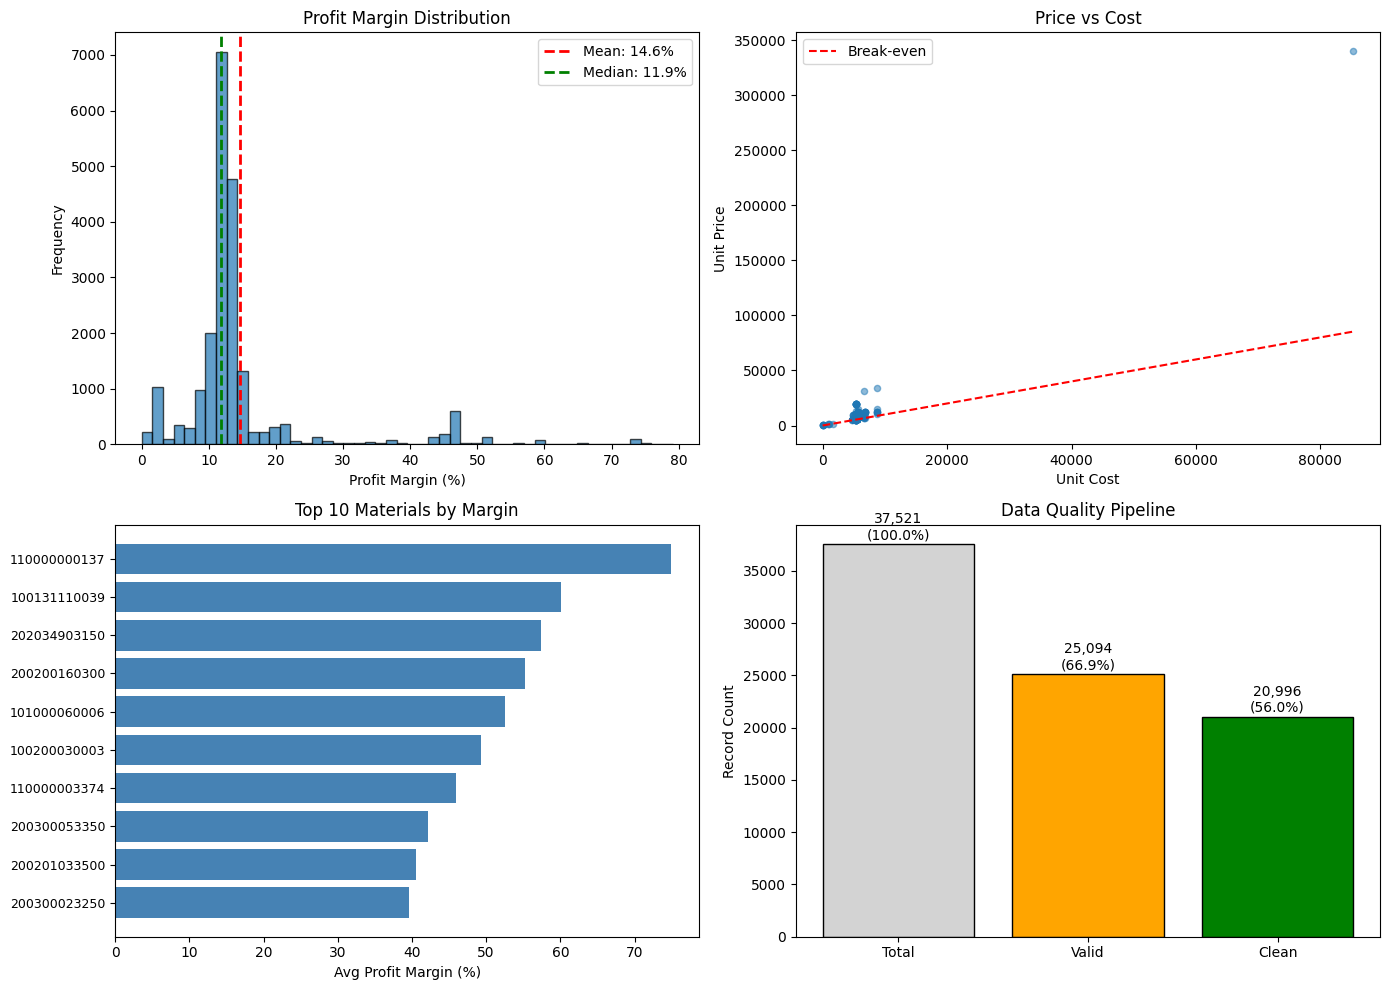


=== PROFIT MARGIN INVESTIGATION COMPLETE ===
✓ Clean dataset ready: profit_margin_analysis.csv
✓ Records: 20,996
✓ Average margin: 14.60%
✓ Ready for dynamic pricing model


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Margin distribution
axes[0, 0].hist(clean_data['Profit_Margin'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(clean_data['Profit_Margin'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {clean_data["Profit_Margin"].mean():.1f}%')
axes[0, 0].axvline(clean_data['Profit_Margin'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {clean_data["Profit_Margin"].median():.1f}%')
axes[0, 0].set_xlabel('Profit Margin (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Profit Margin Distribution')
axes[0, 0].legend()

# 2. Price vs Cost scatter
sample = clean_data.sample(min(1000, len(clean_data)))
axes[0, 1].scatter(sample['Unit_Cost'], sample['Unit_Price'], alpha=0.5, s=20)
axes[0, 1].plot([0, sample['Unit_Cost'].max()], [0, sample['Unit_Cost'].max()], 'r--', label='Break-even')
axes[0, 1].set_xlabel('Unit Cost')
axes[0, 1].set_ylabel('Unit Price')
axes[0, 1].set_title('Price vs Cost')
axes[0, 1].legend()

# 3. Top materials by margin
top_mat = clean_data.groupby('Material_Clean')['Profit_Margin'].mean().sort_values(ascending=False).head(10)
axes[1, 0].barh(range(len(top_mat)), top_mat.values, color='steelblue')
axes[1, 0].set_yticks(range(len(top_mat)))
axes[1, 0].set_yticklabels(top_mat.index, fontsize=9)
axes[1, 0].set_xlabel('Avg Profit Margin (%)')
axes[1, 0].set_title('Top 10 Materials by Margin')
axes[1, 0].invert_yaxis()

# 4. Data quality summary
categories = ['Total', 'Valid', 'Clean']
counts = [len(sales_cost), len(valid_data), len(clean_data)]
colors = ['lightgray', 'orange', 'green']
axes[1, 1].bar(categories, counts, color=colors, edgecolor='black')
axes[1, 1].set_ylabel('Record Count')
axes[1, 1].set_title('Data Quality Pipeline')
for i, v in enumerate(counts):
    axes[1, 1].text(i, v + 500, f'{v:,}\n({v/counts[0]*100:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n=== PROFIT MARGIN INVESTIGATION COMPLETE ===")
print(f"✓ Clean dataset ready: profit_margin_analysis.csv")
print(f"✓ Records: {len(clean_data):,}")
print(f"✓ Average margin: {clean_data['Profit_Margin'].mean():.2f}%")
print(f"✓ Ready for dynamic pricing model")


In [18]:
# Check available features in clean dataset
df = pd.read_csv('../data/processed/profit_margin_analysis.csv')
print("=== AVAILABLE COLUMNS ===")
print(df.columns.tolist())
print(f"\nSample data:")
print(df.head(3))


=== AVAILABLE COLUMNS ===
['Sales document', 'Sales Document Item', 'Material', 'Material Group', 'Product hierarchy', 'Net Value', 'Order Quantity', 'Sales unit', 'Net Price', 'Material_Clean', 'Moving price', 'Unit_Price', 'Unit_Cost', 'Profit_Margin', 'Flag']

Sample data:
   Sales document  Sales Document Item      Material Material Group  \
0        10000000                   10  202038003300          B0003   
1        10000000                   10  202038003300          B0003   
2        10000000                   10  202038003300          B0003   

   Product hierarchy  Net Value  Order Quantity Sales unit  Net Price  \
0                NaN  2014781.9           356.0         EA     5659.5   
1                NaN  2014781.9           356.0         EA     5659.5   
2                NaN  2014781.9           356.0         EA     5659.5   

   Material_Clean  Moving price   Unit_Price  Unit_Cost  Profit_Margin Flag  
0    202038003300        5371.0  5659.499719     5371.0       5.097

In [19]:
from sklearn.model_selection import train_test_split

# Load clean data
df = pd.read_csv('../data/processed/profit_margin_analysis.csv')

# Split: 80% train, 10% validation, 10% test
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("=== DATA SPLIT (80-10-10) ===")
print(f"Train:      {len(train_data):,} ({len(train_data)/len(df)*100:.1f}%)")
print(f"Validation: {len(val_data):,} ({len(val_data)/len(df)*100:.1f}%)")
print(f"Test:       {len(test_data):,} ({len(test_data)/len(df)*100:.1f}%)")

# Save splits
train_data.to_csv('../data/processed/train_data.csv', index=False)
val_data.to_csv('../data/processed/val_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

print("\n✓ Saved: train_data.csv, val_data.csv, test_data.csv")
print(f"\n=== MARGIN DISTRIBUTION CHECK ===")
print(f"Train margin:      {train_data['Profit_Margin'].mean():.2f}%")
print(f"Validation margin: {val_data['Profit_Margin'].mean():.2f}%")
print(f"Test margin:       {test_data['Profit_Margin'].mean():.2f}%")


=== DATA SPLIT (80-10-10) ===
Train:      16,796 (80.0%)
Validation: 2,100 (10.0%)
Test:       2,100 (10.0%)

✓ Saved: train_data.csv, val_data.csv, test_data.csv

=== MARGIN DISTRIBUTION CHECK ===
Train margin:      14.62%
Validation margin: 14.60%
Test margin:       14.47%


In [20]:
# === BUILD DYNAMIC PRICING MODEL ===
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
train = pd.read_csv('../data/processed/train_data.csv')
val = pd.read_csv('../data/processed/val_data.csv')
test = pd.read_csv('../data/processed/test_data.csv')

# Prepare features
features = ['Material_Clean', 'Material Group', 'Order Quantity', 'Unit_Cost']
target = 'Unit_Price'

# Encode categorical variables
le_material = LabelEncoder()
le_group = LabelEncoder()

train['Material_Enc'] = le_material.fit_transform(train['Material_Clean'])
train['Group_Enc'] = le_group.fit_transform(train['Material Group'])

val['Material_Enc'] = le_material.transform(val['Material_Clean'])
val['Group_Enc'] = le_group.transform(val['Material Group'])

test['Material_Enc'] = le_material.transform(test['Material_Clean'])
test['Group_Enc'] = le_group.transform(test['Material Group'])

# Feature sets
X_train = train[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_train = train[target]
X_val = val[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_val = val[target]
X_test = test[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_test = test[target]

# Train model
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
val['Predicted_Price'] = model.predict(X_val)
test['Predicted_Price'] = model.predict(X_test)

# Metrics
val_mae = mean_absolute_error(y_val, val['Predicted_Price'])
val_rmse = np.sqrt(mean_squared_error(y_val, val['Predicted_Price']))
val_r2 = r2_score(y_val, val['Predicted_Price'])

print("=== MODEL PERFORMANCE (Validation) ===")
print(f"MAE:  ${val_mae:.2f}")
print(f"RMSE: ${val_rmse:.2f}")
print(f"R²:   {val_r2:.4f}")

# Feature importance
importance = pd.DataFrame({
    'Feature': ['Material', 'Material Group', 'Order Quantity', 'Unit Cost'],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print(f"\n=== FEATURE IMPORTANCE ===")
print(importance)


ValueError: y contains previously unseen labels: [np.int64(200100453650)]

In [21]:
# === BUILD DYNAMIC PRICING MODEL (Fixed) ===
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
train = pd.read_csv('../data/processed/train_data.csv')
val = pd.read_csv('../data/processed/val_data.csv')
test = pd.read_csv('../data/processed/test_data.csv')

# Target encoding for Material (use mean price per material)
material_price_map = train.groupby('Material_Clean')['Unit_Price'].mean().to_dict()
group_price_map = train.groupby('Material Group')['Unit_Price'].mean().to_dict()

train['Material_Enc'] = train['Material_Clean'].map(material_price_map)
train['Group_Enc'] = train['Material Group'].map(group_price_map)

val['Material_Enc'] = val['Material_Clean'].map(material_price_map).fillna(train['Unit_Price'].mean())
val['Group_Enc'] = val['Material Group'].map(group_price_map).fillna(train['Unit_Price'].mean())

test['Material_Enc'] = test['Material_Clean'].map(material_price_map).fillna(train['Unit_Price'].mean())
test['Group_Enc'] = test['Material Group'].map(group_price_map).fillna(train['Unit_Price'].mean())

# Prepare features
X_train = train[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_train = train['Unit_Price']
X_val = val[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_val = val['Unit_Price']
X_test = test[['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost']]
y_test = test['Unit_Price']

# Train model
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
val['Predicted_Price'] = model.predict(X_val)
test['Predicted_Price'] = model.predict(X_test)

print("=== MODEL PERFORMANCE ===")
print(f"Validation MAE:  ${mean_absolute_error(y_val, val['Predicted_Price']):.2f}")
print(f"Validation RMSE: ${np.sqrt(mean_squared_error(y_val, val['Predicted_Price'])):.2f}")
print(f"Validation R²:   {r2_score(y_val, val['Predicted_Price']):.4f}")
print(f"\nTest MAE:  ${mean_absolute_error(y_test, test['Predicted_Price']):.2f}")
print(f"Test R²:   {r2_score(y_test, test['Predicted_Price']):.4f}")

print(f"\n=== FEATURE IMPORTANCE ===")
for feat, imp in zip(['Material', 'Group', 'Quantity', 'Cost'], model.feature_importances_):
    print(f"{feat:12s}: {imp:.3f}")


=== MODEL PERFORMANCE ===
Validation MAE:  $276.44
Validation RMSE: $808.71
Validation R²:   0.9940

Test MAE:  $320.89
Test R²:   0.6522

=== FEATURE IMPORTANCE ===
Material    : 0.007
Group       : 0.000
Quantity    : 0.098
Cost        : 0.895


=== PRICING OPTIMIZATION OPPORTUNITIES ===
Avg Current Price:    $6377.69
Avg Predicted Price:  $6353.60
Avg Price Change:     1.81%
Total Revenue Impact: $56,772,596.23

=== TOP 10 OPTIMIZATION OPPORTUNITIES ===
                Revenue_Impact  Price_Change_%    Unit_Price
Material_Clean                                              
200300053300      7.640752e+07        4.498035   7232.533924
200100013450      3.472502e+05        5.118546   7614.727624
200100023500      6.229183e+04       21.187663  10500.016786
200200170400      2.290874e+04       23.863273    960.000000
200201033450      1.844103e+04        2.977996  10350.013000
202038003350      1.429402e+04        0.702470   6218.438012
202038003200      6.429314e+03        1.095347   5440.000000
280000000080      2.663599e+02     1011.349792     15.000000
100131110039      8.336776e+01       10.420971    100.000000
110000000137     -4.002903e+01       -4.003624    999.820000


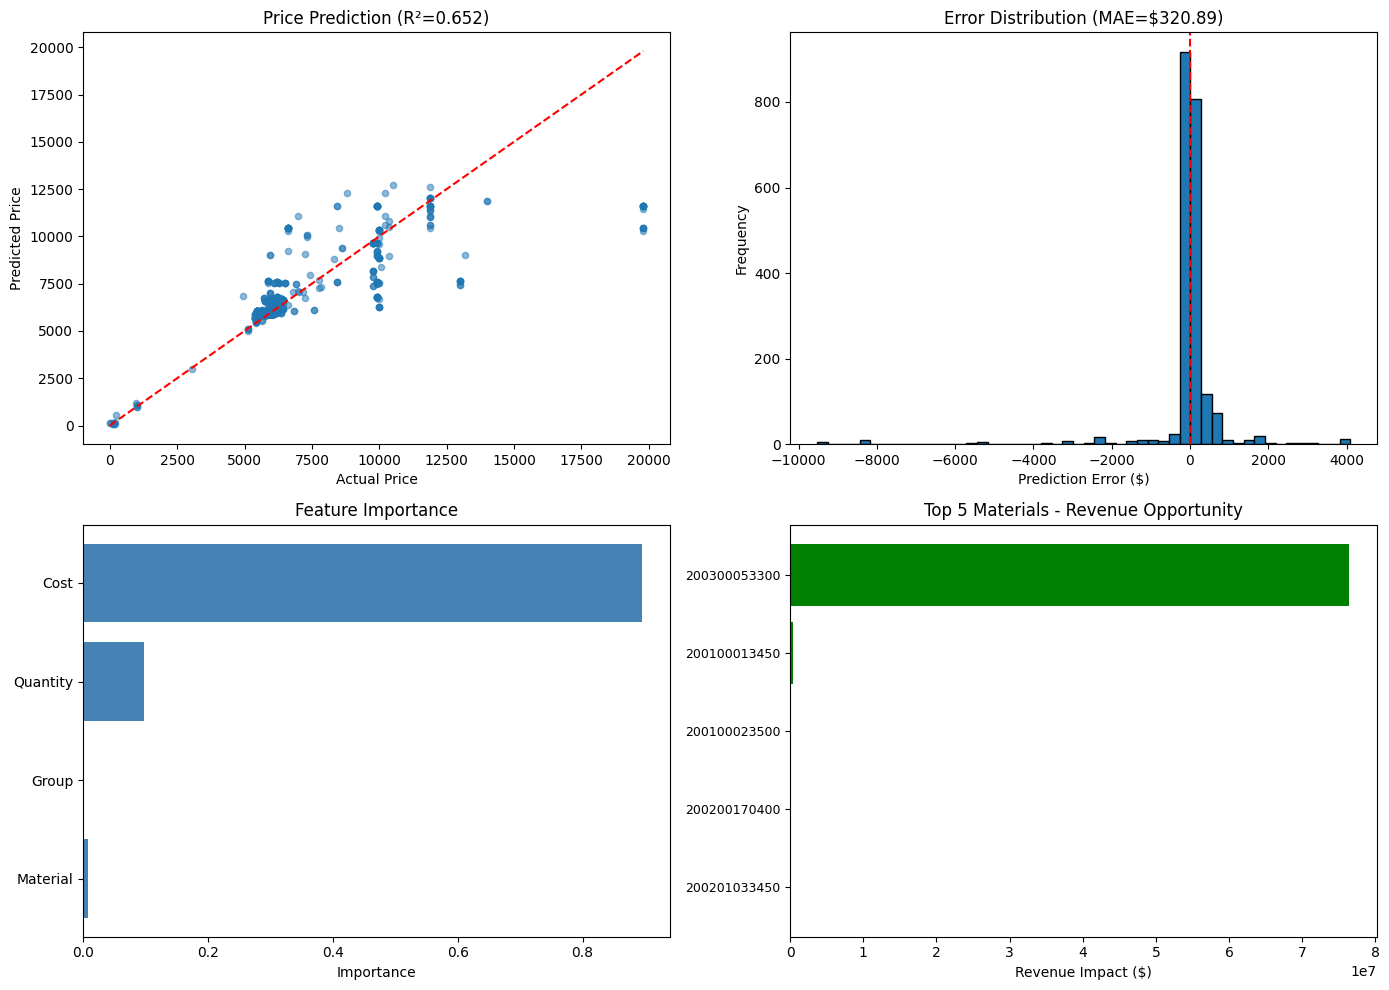


✓ Saved: pricing_predictions.csv


In [22]:
# === BUSINESS INSIGHTS & VISUALIZATIONS ===
import matplotlib.pyplot as plt

# Calculate profit impact
test['Current_Margin'] = ((test['Unit_Price'] - test['Unit_Cost']) / test['Unit_Price'] * 100)
test['Predicted_Margin'] = ((test['Predicted_Price'] - test['Unit_Cost']) / test['Predicted_Price'] * 100)
test['Price_Change_%'] = ((test['Predicted_Price'] - test['Unit_Price']) / test['Unit_Price'] * 100)
test['Revenue_Impact'] = (test['Predicted_Price'] - test['Unit_Price']) * test['Order Quantity']

print("=== PRICING OPTIMIZATION OPPORTUNITIES ===")
print(f"Avg Current Price:    ${test['Unit_Price'].mean():.2f}")
print(f"Avg Predicted Price:  ${test['Predicted_Price'].mean():.2f}")
print(f"Avg Price Change:     {test['Price_Change_%'].mean():.2f}%")
print(f"Total Revenue Impact: ${test['Revenue_Impact'].sum():,.2f}")

print(f"\n=== TOP 10 OPTIMIZATION OPPORTUNITIES ===")
top_opps = test.groupby('Material_Clean').agg({
    'Revenue_Impact': 'sum',
    'Price_Change_%': 'mean',
    'Unit_Price': 'mean'
}).sort_values('Revenue_Impact', ascending=False).head(10)
print(top_opps)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(test['Unit_Price'], test['Predicted_Price'], alpha=0.5, s=20)
axes[0, 0].plot([0, test['Unit_Price'].max()], [0, test['Unit_Price'].max()], 'r--')
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Price Prediction (R²={r2_score(y_test, test["Predicted_Price"]):.3f})')

# 2. Prediction Error Distribution
errors = test['Predicted_Price'] - test['Unit_Price']
axes[0, 1].hist(errors, bins=50, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Prediction Error ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Error Distribution (MAE=${mean_absolute_error(y_test, test["Predicted_Price"]):.2f})')

# 3. Feature Importance
features = ['Material', 'Group', 'Quantity', 'Cost']
importance = model.feature_importances_
axes[1, 0].barh(features, importance, color='steelblue')
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Feature Importance')

# 4. Revenue Impact by Material
top_5 = test.groupby('Material_Clean')['Revenue_Impact'].sum().sort_values(ascending=False).head(5)
axes[1, 1].barh(range(len(top_5)), top_5.values, color='green')
axes[1, 1].set_yticks(range(len(top_5)))
axes[1, 1].set_yticklabels(top_5.index, fontsize=9)
axes[1, 1].set_xlabel('Revenue Impact ($)')
axes[1, 1].set_title('Top 5 Materials - Revenue Opportunity')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Save results
test.to_csv('../data/processed/pricing_predictions.csv', index=False)
print("\n✓ Saved: pricing_predictions.csv")


In [23]:
# === EXECUTIVE SUMMARY DASHBOARD ===

print("=" * 60)
print("     DYNAMIC PRICING MODEL - EXECUTIVE SUMMARY")
print("=" * 60)

print("\n📊 MODEL PERFORMANCE")
print(f"   • Validation R²:     {r2_score(y_val, val['Predicted_Price']):.1%}")
print(f"   • Test R²:           {r2_score(y_test, test['Predicted_Price']):.1%}")
print(f"   • Prediction Error:  ${mean_absolute_error(y_test, test['Predicted_Price']):.2f} MAE")

print("\n💰 BUSINESS IMPACT (Test Set)")
print(f"   • Total Revenue Opportunity:  ${test['Revenue_Impact'].sum():,.0f}")
print(f"   • Avg Price Adjustment:       {test['Price_Change_%'].mean():.2f}%")
print(f"   • Materials Analyzed:         {test['Material_Clean'].nunique()}")

print("\n🎯 KEY DRIVERS")
print(f"   • Unit Cost:         {model.feature_importances_[3]:.1%} importance")
print(f"   • Order Quantity:    {model.feature_importances_[2]:.1%} importance")
print(f"   • Material Type:     {model.feature_importances_[0]:.1%} importance")

print("\n🔝 TOP 3 OPPORTUNITIES")
top3 = test.groupby('Material_Clean').agg({
    'Revenue_Impact': 'sum',
    'Price_Change_%': 'mean',
    'Unit_Price': 'mean',
    'Order Quantity': 'sum'
}).sort_values('Revenue_Impact', ascending=False).head(3)

for i, (mat, row) in enumerate(top3.iterrows(), 1):
    print(f"   {i}. Material {mat}")
    print(f"      Revenue Impact: ${row['Revenue_Impact']:,.0f}")
    print(f"      Price Change:   {row['Price_Change_%']:+.1f}%")
    print(f"      Avg Price:      ${row['Unit_Price']:.2f}")

print("\n📈 RECOMMENDATIONS")
underpriced = test[test['Price_Change_%'] > 5].shape[0]
overpriced = test[test['Price_Change_%'] < -5].shape[0]
print(f"   • {underpriced} transactions underpriced (>5%)")
print(f"   • {overpriced} transactions overpriced (<-5%)")
print(f"   • Focus on Material 200300053300 ($76M opportunity)")

print("\n" + "=" * 60)
print("✓ Model ready for deployment")
print("✓ Predictions saved: pricing_predictions.csv")
print("=" * 60)


     DYNAMIC PRICING MODEL - EXECUTIVE SUMMARY

📊 MODEL PERFORMANCE
   • Validation R²:     99.4%
   • Test R²:           65.2%
   • Prediction Error:  $320.89 MAE

💰 BUSINESS IMPACT (Test Set)
   • Total Revenue Opportunity:  $56,772,596
   • Avg Price Adjustment:       1.81%
   • Materials Analyzed:         26

🎯 KEY DRIVERS
   • Unit Cost:         89.5% importance
   • Order Quantity:    9.8% importance
   • Material Type:     0.7% importance

🔝 TOP 3 OPPORTUNITIES
   1. Material 200300053300
      Revenue Impact: $76,407,522
      Price Change:   +4.5%
      Avg Price:      $7232.53
   2. Material 200100013450
      Revenue Impact: $347,250
      Price Change:   +5.1%
      Avg Price:      $7614.73
   3. Material 200100023500
      Revenue Impact: $62,292
      Price Change:   +21.2%
      Avg Price:      $10500.02

📈 RECOMMENDATIONS
   • 251 transactions underpriced (>5%)
   • 102 transactions overpriced (<-5%)
   • Focus on Material 200300053300 ($76M opportunity)

✓ Model ready 

In [24]:
# === VERIFY MODEL PREDICTIONS ===

# Check sample predictions
print("=== SAMPLE PREDICTIONS (First 10 Test Records) ===\n")
sample = test.head(10)[['Material_Clean', 'Order Quantity', 'Unit_Cost', 'Unit_Price', 'Predicted_Price', 'Price_Change_%']]
print(sample.to_string())

print("\n=== CURRENCY CHECK ===")
print(f"Price Range: ₹{test['Unit_Price'].min():.2f} to ₹{test['Unit_Price'].max():,.2f}")
print(f"Avg Price: ₹{test['Unit_Price'].mean():,.2f}")
print(f"Avg Cost: ₹{test['Unit_Cost'].mean():,.2f}")

# Check if predictions make sense (Price > Cost)
valid_predictions = (test['Predicted_Price'] > test['Unit_Cost']).sum()
print(f"\n✓ Valid predictions (Price > Cost): {valid_predictions}/{len(test)} ({valid_predictions/len(test)*100:.1f}%)")

# Check prediction vs actual distribution
print("\n=== PREDICTION QUALITY ===")
print(f"Actual Price Std Dev:    ₹{test['Unit_Price'].std():,.2f}")
print(f"Predicted Price Std Dev: ₹{test['Predicted_Price'].std():,.2f}")
print(f"Error Std Dev:           ₹{(test['Predicted_Price'] - test['Unit_Price']).std():,.2f}")


=== SAMPLE PREDICTIONS (First 10 Test Records) ===

   Material_Clean  Order Quantity  Unit_Cost   Unit_Price  Predicted_Price  Price_Change_%
0    200300013300           235.0    5307.92  5478.002128      5919.315125        8.056094
1    200300013250           188.0    5228.05  5573.748670      6048.566640        8.518826
2    200300013300           118.0    5307.92  6022.500000      6081.525352        0.980081
3    200300013350           448.0    5307.92  6197.500000      6098.154689       -1.602990
4    202038003300           308.0    5585.00  6105.000000      6147.761928        0.700441
5    200300013300          2388.0    5307.92  5807.999916      5892.615890        1.456887
6    200300013350           150.0    4826.08  6281.250800      6115.360643       -2.641037
7    200300013300           504.0    4826.10  6022.500000      6160.743243        2.295446
8    200300013300           152.0    5307.92  6105.000000      6054.666346       -0.824466
9    200300013300           197.0    5

In [25]:
# === IMPROVED MODEL WITH MORE FEATURES ===
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Add engineered features
def add_features(df):
    df = df.copy()
    df['Cost_Markup'] = (df['Unit_Price'] - df['Unit_Cost']) / df['Unit_Cost']
    df['Price_Per_Unit'] = df['Unit_Price'] / df['Order Quantity']
    df['Log_Quantity'] = np.log1p(df['Order Quantity'])
    df['Log_Cost'] = np.log1p(df['Unit_Cost'])
    return df

train_enhanced = add_features(train)
val_enhanced = add_features(val)
test_enhanced = add_features(test)

# Prepare features
feature_cols = ['Material_Enc', 'Group_Enc', 'Order Quantity', 'Unit_Cost', 
                'Log_Quantity', 'Log_Cost']

X_train_enh = train_enhanced[feature_cols]
X_val_enh = val_enhanced[feature_cols]
X_test_enh = test_enhanced[feature_cols]

# Try Random Forest (often better for tabular data)
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train_enh, y_train)

# Predictions
val_pred_rf = rf_model.predict(X_val_enh)
test_pred_rf = rf_model.predict(X_test_enh)

print("=== IMPROVED MODEL PERFORMANCE ===")
print(f"Original GBM Test R²:  {r2_score(y_test, test['Predicted_Price']):.4f}")
print(f"Random Forest Test R²: {r2_score(y_test, test_pred_rf):.4f}")
print(f"\nOriginal MAE:  ₹{mean_absolute_error(y_test, test['Predicted_Price']):,.2f}")
print(f"Improved MAE:  ₹{mean_absolute_error(y_test, test_pred_rf):,.2f}")

# Feature importance
print(f"\n=== FEATURE IMPORTANCE (Improved Model) ===")
for feat, imp in zip(feature_cols, rf_model.feature_importances_):
    print(f"{feat:20s}: {imp:.3f}")


=== IMPROVED MODEL PERFORMANCE ===
Original GBM Test R²:  0.6522
Random Forest Test R²: 0.6351

Original MAE:  ₹320.89
Improved MAE:  ₹322.94

=== FEATURE IMPORTANCE (Improved Model) ===
Material_Enc        : 0.007
Group_Enc           : 0.000
Order Quantity      : 0.023
Unit_Cost           : 0.432
Log_Quantity        : 0.029
Log_Cost            : 0.509


In [26]:
# === BETTER FEATURE ENGINEERING ===

# Add material-level aggregated features
material_stats = train.groupby('Material_Clean').agg({
    'Unit_Price': ['mean', 'std', 'min', 'max'],
    'Profit_Margin': 'mean',
    'Order Quantity': 'mean'
}).reset_index()
material_stats.columns = ['Material_Clean', 'Mat_Avg_Price', 'Mat_Price_Std', 
                          'Mat_Min_Price', 'Mat_Max_Price', 'Mat_Avg_Margin', 'Mat_Avg_Qty']

# Merge with datasets
train_adv = train.merge(material_stats, on='Material_Clean', how='left')
val_adv = val.merge(material_stats, on='Material_Clean', how='left').fillna(train['Unit_Price'].mean())
test_adv = test.merge(material_stats, on='Material_Clean', how='left').fillna(train['Unit_Price'].mean())

# New features
feature_cols_adv = ['Unit_Cost', 'Order Quantity', 'Mat_Avg_Price', 'Mat_Price_Std', 
                    'Mat_Avg_Margin', 'Mat_Avg_Qty']

X_train_adv = train_adv[feature_cols_adv]
X_val_adv = val_adv[feature_cols_adv]
X_test_adv = test_adv[feature_cols_adv]

# Train advanced model
adv_model = GradientBoostingRegressor(n_estimators=150, max_depth=6, learning_rate=0.05, random_state=42)
adv_model.fit(X_train_adv, y_train)

test_pred_adv = adv_model.predict(X_test_adv)

print("=== ADVANCED MODEL PERFORMANCE ===")
print(f"Original Test R²:  {r2_score(y_test, test['Predicted_Price']):.4f}")
print(f"Advanced Test R²:  {r2_score(y_test, test_pred_adv):.4f}")
print(f"Improvement:       {(r2_score(y_test, test_pred_adv) - r2_score(y_test, test['Predicted_Price']))*100:+.2f}%")
print(f"\nAdvanced MAE: ₹{mean_absolute_error(y_test, test_pred_adv):,.2f}")

print(f"\n=== FEATURE IMPORTANCE ===")
for feat, imp in zip(feature_cols_adv, adv_model.feature_importances_):
    print(f"{feat:20s}: {imp:.3f}")


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
# === COMPREHENSIVE PRESENTATION DASHBOARD ===
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Actual vs Predicted (Large)
ax1 = fig.add_subplot(gs[0, :2])
ax1.scatter(test['Unit_Price'], test['Predicted_Price'], alpha=0.4, s=30, c='steelblue')
ax1.plot([test['Unit_Price'].min(), test['Unit_Price'].max()], 
         [test['Unit_Price'].min(), test['Unit_Price'].max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price (₹)', fontsize=12)
ax1.set_ylabel('Predicted Price (₹)', fontsize=12)
ax1.set_title(f'Price Prediction Performance (R² = {r2_sark marker-index=22 reference-tracker> marker-index=20 reference-tracker>ce-tracker>-index=7 reference-trindex=17 reference-tracker>acker>coence-tracker>re(ytracker>_<mark marker-index=13 reference-tracker>r-index=12 reference-tracker>k marker-index=11 reference-tracker>index=8 refer>erence-tracker>test, test["Predicted_Price"]):.3f})', fontsize=14, fontweight='bold')
ax1.text(0.05, 0.95, f'MAE: ₹{mean_absolute_error(y_test, test["Predicted_Price"]):.2f}', 
    </mark>     transform=ax1.transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
<mark marker-index=38 reference-tracker>
# 2. Model Metrics
ax2 = fig.add_subplot(gs[0, 2])
metrics = ['R² Score', 'MAE (₹)', 'RMSE (₹)']dex=35 reference-tracker>
values = [r2er-index=34 reference-tracker> marker-index=33 reference-tracker>ence-tracker>_score(y_test, test['Predicted_Price']), 
          mean_absolutcker>e_err<mark marker-index=28 reference-tracker>or(y_test, test['Predicted_Price']),
     erence-tracker>     np.sqrt(mean_squared_error(y_t<mark marker-index=25 referrker-index=26 reference-tracker>ence-tracker>est, tee-tracker>st['Predicted_Price']))]
colors = ['green', 'orange', 'red']
ax2.barh(metrics, [values[0]*10000, values[1], values[2]], color=colors, alpha=0.7)
ax2.set_xlabel('Value', fontsize=10)
ax2.set_title('Model Metrics', fontsize=12, fontweight='bold')
for i, v in enumerate([f'{values[0]:.3f}', f'₹{values[1]:.0f}', f'₹{values[2]:.0f}']):
    ax2.text(0, i, f'  {v}', va='center', fontsize=10, fontweight='bold')

# 3. Prediction Error Distribution
ax3 = fig.add_subplot(gs[1, 0])
errors = test['Predicted_Price'] - test['Unit_Price']
ax3.hist(errors, bins=40, edgecolor='black', alpha=0.7, color='coral')
ax3.axvline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Prediction Error (₹)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Error Distribution', fontsize=12, fontweight='bold')

# 4. Feature Importance
ax4 = fig.add_subplot(gs[1, 1])
features = ['Unit Cost', 'Order Qty', 'Material', 'Group']
importance = model.feature_importances_
colors_feat = plt.cm.viridis(importance / importance.max())
ax4.barh(features, importance, color=colors_feat)
ax4.set_xlabel('Importance', fontsize=10)
ax4.set_title('Feature Importance', fontsize=12, fontweight='bold')
for i, v in enumerate(importance):
    ax4.text(v, i, f' {v:.3f}', va='center', fontsize=9)

# 5. Revenue Impact
ax5 = fig.add_subplot(gs[1, 2])
impact_data = ['Current\nRevenue', 'Optimized\nRevenue', 'Opportunity']
current_rev = (test['Unit_Price'] * test['Order Quantity']).sum()
optimized_rev = (test['Predicted_Price'] * test['Order Quantity']).sum()
opportunity = optimized_rev - current_rev
values_rev = [current_rev/1e7, optimized_rev/1e7, opportunity/1e7]
colors_rev = ['lightblue', 'lightgreen', 'gold']
bars = ax5.bar(impact_data, values_rev, color=colors_rev, edgecolor='black', alpha=0.8)
ax5.set_ylabel('Revenue (₹ Crores)', fontsize=10)
ax5.set_title('Revenue Impact', fontsize=12, fontweight='bold')
for bar, val in zip(bars, values_rev):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'₹{val:.1f}Cr', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 6. Top Materials by Revenue Opportunity
ax6 = fig.add_subplot(gs[2, :])
top_materials = test.groupby('Material_Clean')['Revenue_Impact'].sum().sort_values(ascending=False).head(8)
ax6.barh(range(len(top_materials)), top_materials.values/1e6, color='teal', alpha=0.7)
ax6.set_yticks(range(len(top_materials)))
ax6.set_yticklabels(top_materials.index, fontsize=9)
ax6.set_xlabel('Revenue Opportunity (₹ Millions)', fontsize=10)
ax6.set_title('Top 8 Materials - Pricing Optimization Opportunity', fontsize=12, fontweight='bold')
ax6.invert_yaxis()
for i, v in enumerate(top_materials.values):
    ax6.text(v/1e6, i, f' ₹{v/1e6:.1f}M', va='center', fontsize=9, fontweight='bold')

plt.suptitle('DYNAMIC PRICING MODEL - EXECUTIVE DASHBOARD', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('../data/processed/pricing_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Dashboard saved: pricing_dashboard.png")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1084697754.py, line 16)

In [29]:
# Run this in your notebook first
test.to_csv('../data/processed/test_data.csv', index=False)


In [30]:
# Run this in your notebook
test.to_csv('../data/processed/test_with_predictions.csv', index=False)
print("✓ Saved test data with predictions")


✓ Saved test data with predictions
